In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.impute import SimpleImputer
# from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv('../data/raw/df_flight.csv')

In [3]:
df_latlon = pd.read_csv('../data/raw/latlon.csv')


In [4]:
df_airports = pd.read_csv('../data/raw/airports.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58191 entries, 0 to 58190
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 58191 non-null  int64  
 1   MONTH                58191 non-null  int64  
 2   DAY                  58191 non-null  int64  
 3   DAY_OF_WEEK          58191 non-null  int64  
 4   FLIGHT_NUMBER        58191 non-null  int64  
 5   TAIL_NUMBER          58046 non-null  object 
 6   ORIGIN_AIRPORT       58191 non-null  object 
 7   DESTINATION_AIRPORT  58191 non-null  object 
 8   SCHEDULED_DEPARTURE  58191 non-null  int64  
 9   DEPARTURE_TIME       57270 non-null  float64
 10  DEPARTURE_DELAY      57270 non-null  float64
 11  TAXI_OUT             57238 non-null  float64
 12  WHEELS_OFF           57238 non-null  float64
 13  SCHEDULED_TIME       58191 non-null  float64
 14  ELAPSED_TIME         57069 non-null  float64
 15  AIR_TIME             57069 non-null 

In [6]:
df.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED,Status,lat,lon
count,58191.0,58191.000000,58191.000000,58191.000000,58191.000000,58191.000000,57270.000000,57270.000000,57238.000000,57238.000000,58191.000000,57069.000000,57069.000000,58191.000000,57196.000000,57196.000000,58191.000000,57196.000000,57069.000000,58191.000000,58191.000000,10478.000000,10478.000000,10478.000000,10478.000000,10478.000000,58191.000000,58191.000000,53308.000000,53308.000000
mean,2015.0,6.518396,15.700486,3.921053,2170.688079,1328.020570,1333.353414,9.061481,16.124672,1354.948863,141.630544,137.067445,113.500727,821.953275,1467.773988,7.444577,1490.443333,1473.033097,4.135871,0.002715,0.016566,13.115957,0.072533,19.046574,23.162245,3.035980,0.356722,0.308965,36.608835,-95.608244
std,0.0,3.412149,8.780306,1.985154,1760.825873,484.736498,497.312881,37.224569,9.101632,499.036147,75.242984,74.366451,72.300870,607.406468,523.097320,5.587138,508.389324,527.169620,39.395254,0.052037,0.127640,26.463656,2.092289,51.914438,42.806672,19.906327,0.479036,0.733202,5.998760,18.206516
min,2015.0,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,-32.000000,1.000000,1.000000,20.000000,17.000000,9.000000,31.000000,1.000000,1.000000,1.000000,1.000000,-74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.483450,-170.710526
25%,2015.0,4.000000,8.000000,2.000000,724.000000,915.000000,919.000000,-5.000000,11.000000,934.000000,85.000000,82.000000,60.000000,372.000000,1053.000000,4.000000,1109.000000,1057.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.895951,-111.977773
50%,2015.0,7.000000,16.000000,4.000000,1690.000000,1325.000000,1329.000000,-2.000000,14.000000,1342.000000,123.000000,118.000000,94.000000,647.000000,1507.000000,6.000000,1519.000000,1511.000000,-5.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,36.894611,-90.258028
75%,2015.0,9.000000,23.000000,6.000000,3223.000000,1730.000000,1738.000000,7.000000,19.000000,1752.000000,174.000000,169.000000,144.000000,1062.000000,1908.000000,9.000000,1915.000000,1913.000000,8.000000,0.000000,0.000000,17.000000,0.000000,19.000000,29.000000,0.000000,1.000000,0.000000,40.788388,-81.755167
max,2015.0,12.000000,31.000000,7.000000,7438.000000,2359.000000,2400.000000,1522.000000,225.000000,2400.000000,718.000000,710.000000,682.000000,4983.000000,2400.000000,174.000000,2359.000000,2400.000000,1508.000000,1.000000,1.000000,643.000000,158.000000,1508.000000,1294.000000,627.000000,1.000000,4.000000,71.285448,-64.798556


In [7]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,DELAYED,Status,lat,lon
0,2015,3,15,7,4790,N825SK,SEA,PDX,1415,1558.0,103.0,17.0,1615.0,55.0,62.0,39.0,129,1654.0,6.0,1510,1700.0,110.0,0,0,NaN,7.0,0.0,12.0,91.0,0.0,Skywest Airlines Inc.,1,2.0,47.448982,-122.309313
1,2015,7,12,7,665,N965WN,OAK,PDX,1930,1943.0,13.0,8.0,1951.0,90.0,83.0,72.0,543,2103.0,3.0,2100,2106.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,1,0.0,37.721291,-122.220717
2,2015,5,23,6,55,N3EGAA,ORD,MCO,1450,1445.0,-5.0,9.0,1454.0,164.0,147.0,132.0,1005,1806.0,6.0,1834,1812.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,0,0.0,41.979595,-87.904464
3,2015,2,27,5,1243,N318JB,DCA,CHS,1757,1755.0,-2.0,20.0,1815.0,102.0,105.0,79.0,444,1934.0,6.0,1939,1940.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,JetBlue Airways,1,0.0,38.852083,-77.037722
4,2015,7,23,4,41,N362SW,LAX,SLC,750,749.0,-1.0,8.0,757.0,100.0,92.0,81.0,590,1018.0,3.0,1030,1021.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,0,0.0,33.942536,-118.408074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58186,2015,9,11,5,248,N4XVAA,DFW,BNA,700,654.0,-6.0,9.0,703.0,109.0,95.0,81.0,631,824.0,5.0,849,829.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,0,0.0,32.895951,-97.037200
58187,2015,3,17,2,808,N795SW,BWI,BNA,1835,1906.0,31.0,9.0,1915.0,115.0,109.0,94.0,587,1949.0,6.0,1930,1955.0,25.0,0,0,NaN,0.0,0.0,16.0,9.0,0.0,Southwest Airlines Co.,1,1.0,39.175402,-76.668198
58188,2015,5,13,3,406,N534JB,LGB,SEA,1110,1104.0,-6.0,15.0,1119.0,160.0,157.0,137.0,965,1336.0,5.0,1350,1341.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,JetBlue Airways,0,0.0,33.817722,-118.151611
58189,2015,7,31,5,833,N939UW,ORD,CLT,715,716.0,1.0,23.0,739.0,121.0,120.0,83.0,599,1002.0,14.0,1016,1016.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,0,0.0,41.979595,-87.904464


In [8]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON',
       'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY',
       'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'AIRLINE', 'DELAYED', 'Status', 'lat', 'lon'],
      dtype='object')

<Axes: >

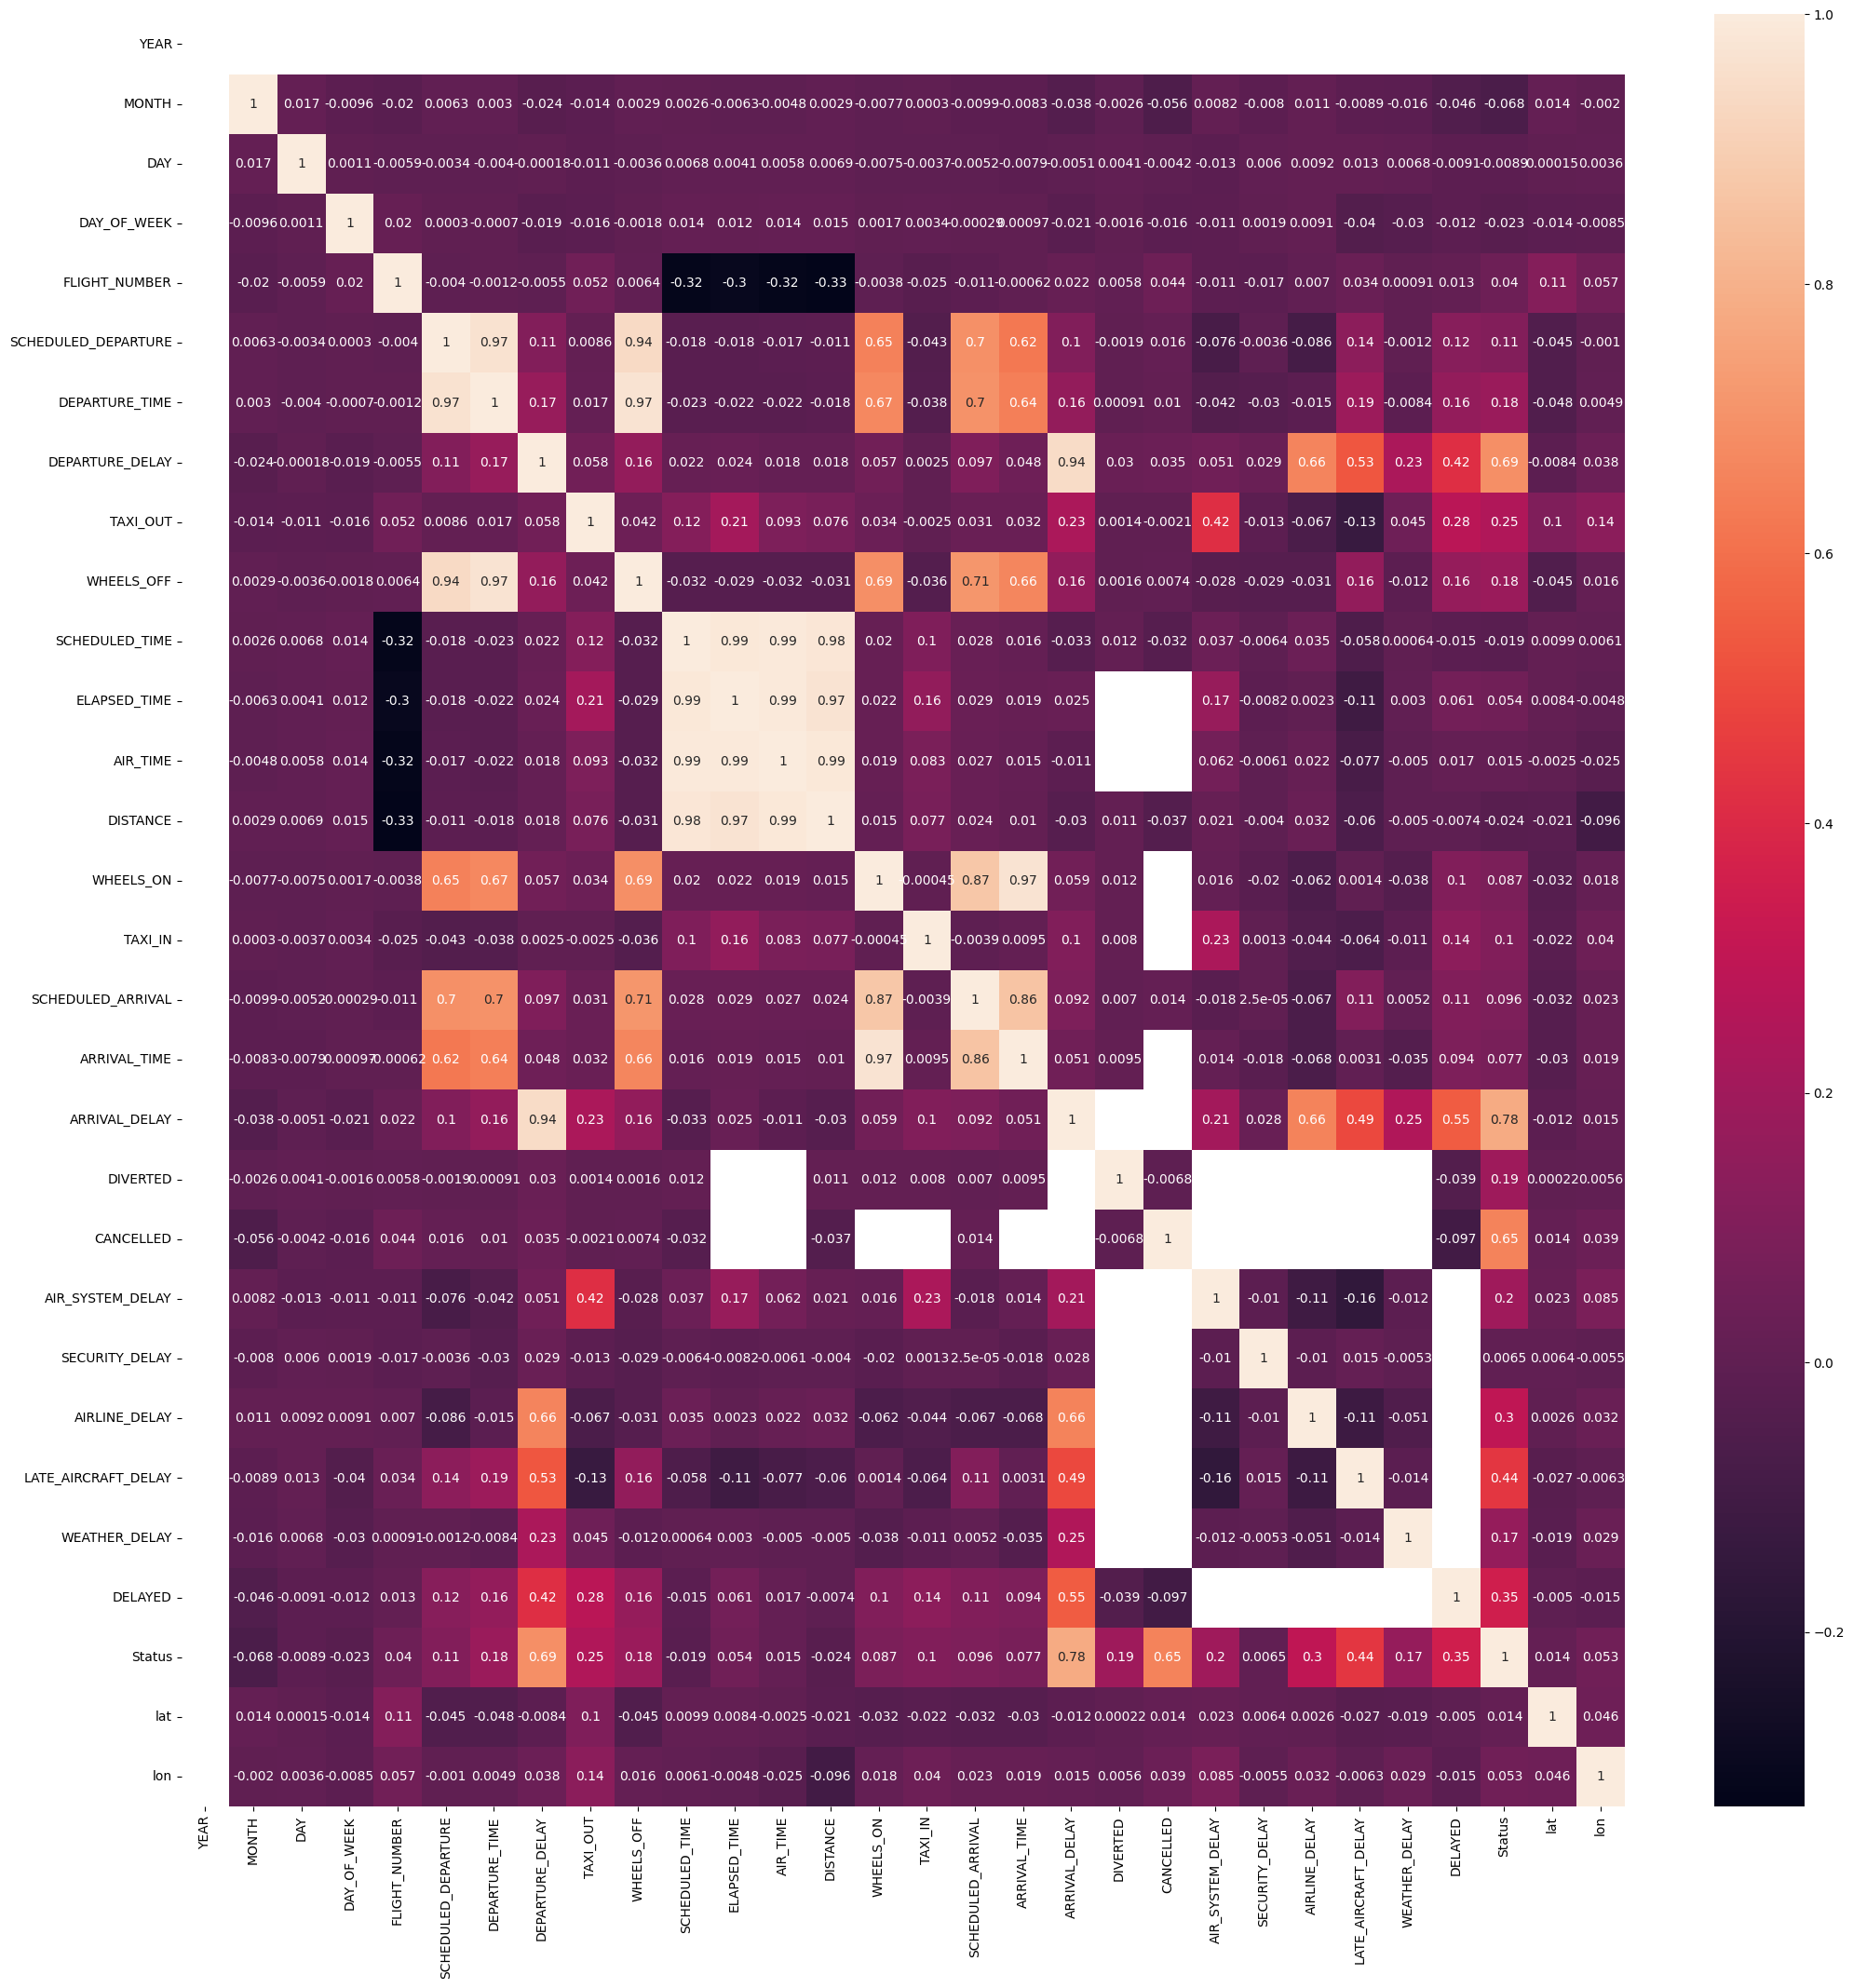

In [9]:
df_no_col = df.drop (df.select_dtypes (include=['object']).columns, axis=1)
plt.figure (figsize=(25,25))
sns.heatmap (df_no_col.corr (), annot=True)

In [10]:
{column: len(df[column].unique()) for column in df.columns}


{'YEAR': 1,
 'MONTH': 12,
 'DAY': 31,
 'DAY_OF_WEEK': 7,
 'FLIGHT_NUMBER': 6167,
 'TAIL_NUMBER': 4545,
 'ORIGIN_AIRPORT': 555,
 'DESTINATION_AIRPORT': 564,
 'SCHEDULED_DEPARTURE': 1182,
 'DEPARTURE_TIME': 1290,
 'DEPARTURE_DELAY': 404,
 'TAXI_OUT': 130,
 'WHEELS_OFF': 1297,
 'SCHEDULED_TIME': 446,
 'ELAPSED_TIME': 477,
 'AIR_TIME': 450,
 'DISTANCE': 1288,
 'WHEELS_ON': 1381,
 'TAXI_IN': 83,
 'SCHEDULED_ARRIVAL': 1299,
 'ARRIVAL_TIME': 1376,
 'ARRIVAL_DELAY': 430,
 'DIVERTED': 2,
 'CANCELLED': 2,
 'CANCELLATION_REASON': 4,
 'AIR_SYSTEM_DELAY': 189,
 'SECURITY_DELAY': 27,
 'AIRLINE_DELAY': 281,
 'LATE_AIRCRAFT_DELAY': 268,
 'WEATHER_DELAY': 159,
 'AIRLINE': 14,
 'DELAYED': 2,
 'Status': 5,
 'lat': 316,
 'lon': 316}

In [11]:
df['DELAYED'] = np.where(df['ARRIVAL_DELAY'] > 0, 1, 0)


In [12]:
df['DELAYED'].value_counts()

DELAYED
0    37433
1    20758
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'YEAR'),
  Text(1, 0, 'MONTH'),
  Text(2, 0, 'DAY'),
  Text(3, 0, 'DAY_OF_WEEK'),
  Text(4, 0, 'FLIGHT_NUMBER'),
  Text(5, 0, 'SCHEDULED_DEPARTURE'),
  Text(6, 0, 'DEPARTURE_TIME'),
  Text(7, 0, 'DEPARTURE_DELAY'),
  Text(8, 0, 'TAXI_OUT'),
  Text(9, 0, 'WHEELS_OFF'),
  Text(10, 0, 'SCHEDULED_TIME'),
  Text(11, 0, 'ELAPSED_TIME'),
  Text(12, 0, 'AIR_TIME'),
  Text(13, 0, 'DISTANCE'),
  Text(14, 0, 'WHEELS_ON'),
  Text(15, 0, 'TAXI_IN'),
  Text(16, 0, 'SCHEDULED_ARRIVAL'),
  Text(17, 0, 'ARRIVAL_TIME'),
  Text(18, 0, 'ARRIVAL_DELAY'),
  Text(19, 0, 'DIVERTED'),
  Text(20, 0, 'CANCELLED'),
  Text(21, 0, 'AIR_SYSTEM_DELAY'),
  Text(22, 0, 'SECURITY_DELAY'),
  Text(23, 0, 'AIRLINE_DELAY'),
  Text(24, 0, 'LATE_AIRCRAFT_DELAY'),
  Text(25, 0, 'WEATHER_DELAY'),
  Text(26, 0, 'DELAYED'),
  Text(27, 0, 'Status'),
  Text(28, 0, 'lat'),
  Text(29, 

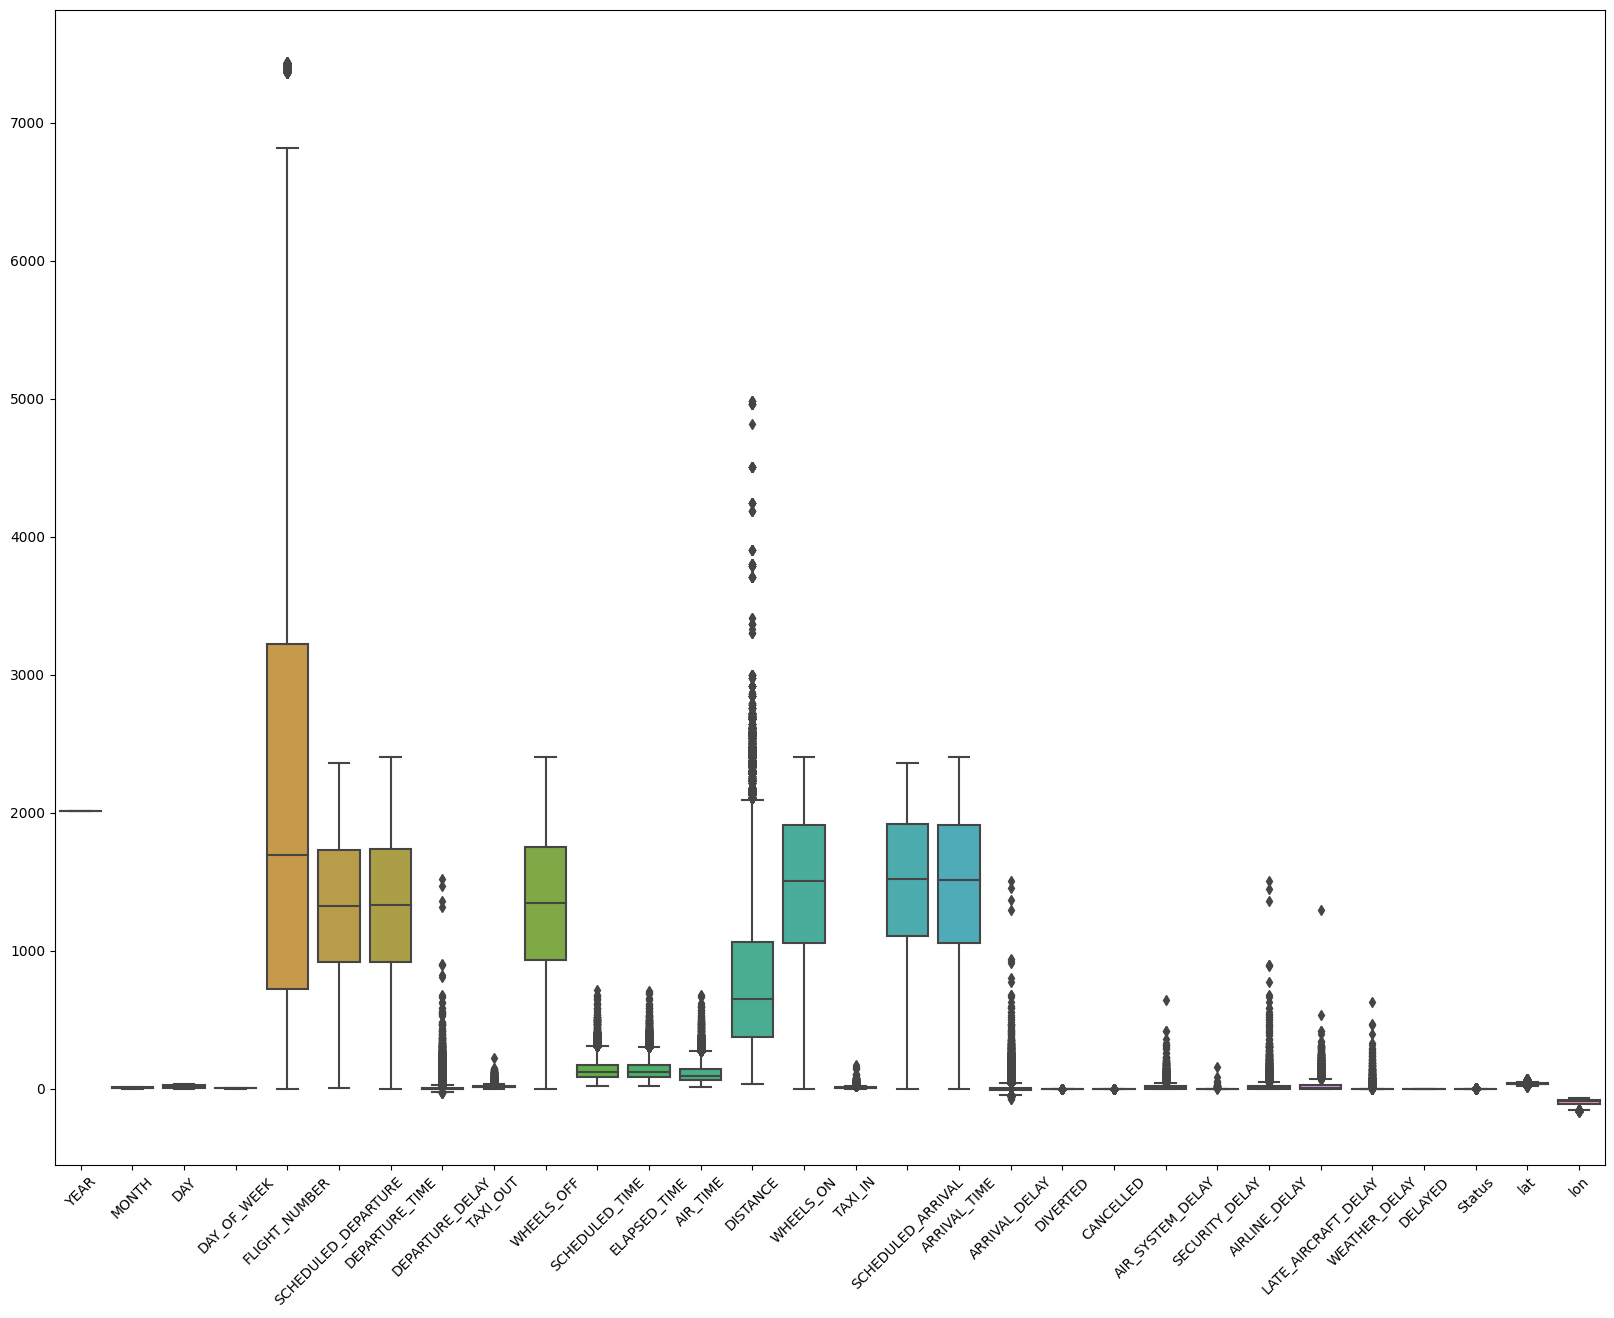

In [13]:
plt.figure(figsize=(20,15))
sns.boxplot(data=df);
plt.xticks(rotation=45)


In [14]:
df['ARRIVAL_DELAY']


0        110.0
1          6.0
2        -22.0
3          1.0
4         -9.0
         ...  
58186    -20.0
58187     25.0
58188     -9.0
58189      0.0
58190    -15.0
Name: ARRIVAL_DELAY, Length: 58191, dtype: float64

In [15]:
# sns.jointplot(data=df, x="CarrierDelay", y="ArrDelay")


In [16]:
# sns.jointplot(data=df, x="TaxiIn", y="ArrDelay")


In [17]:
df['Status']

0        2.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
58186    0.0
58187    1.0
58188    0.0
58189    0.0
58190    0.0
Name: Status, Length: 58191, dtype: float64

<Axes: xlabel='Status', ylabel='count'>

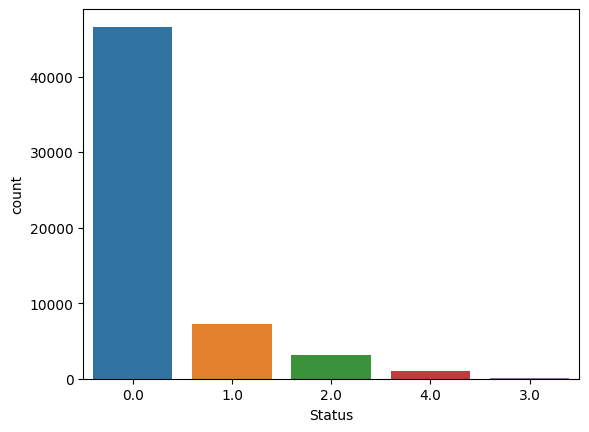

In [18]:
df['Status'] = df['Status'].astype(object)
sns.countplot(x='Status', data=df, order=df['Status'].value_counts().index)

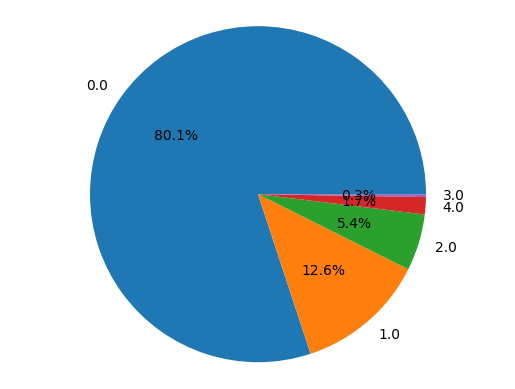

In [19]:
import matplotlib.pyplot as plt

status_counts = df['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

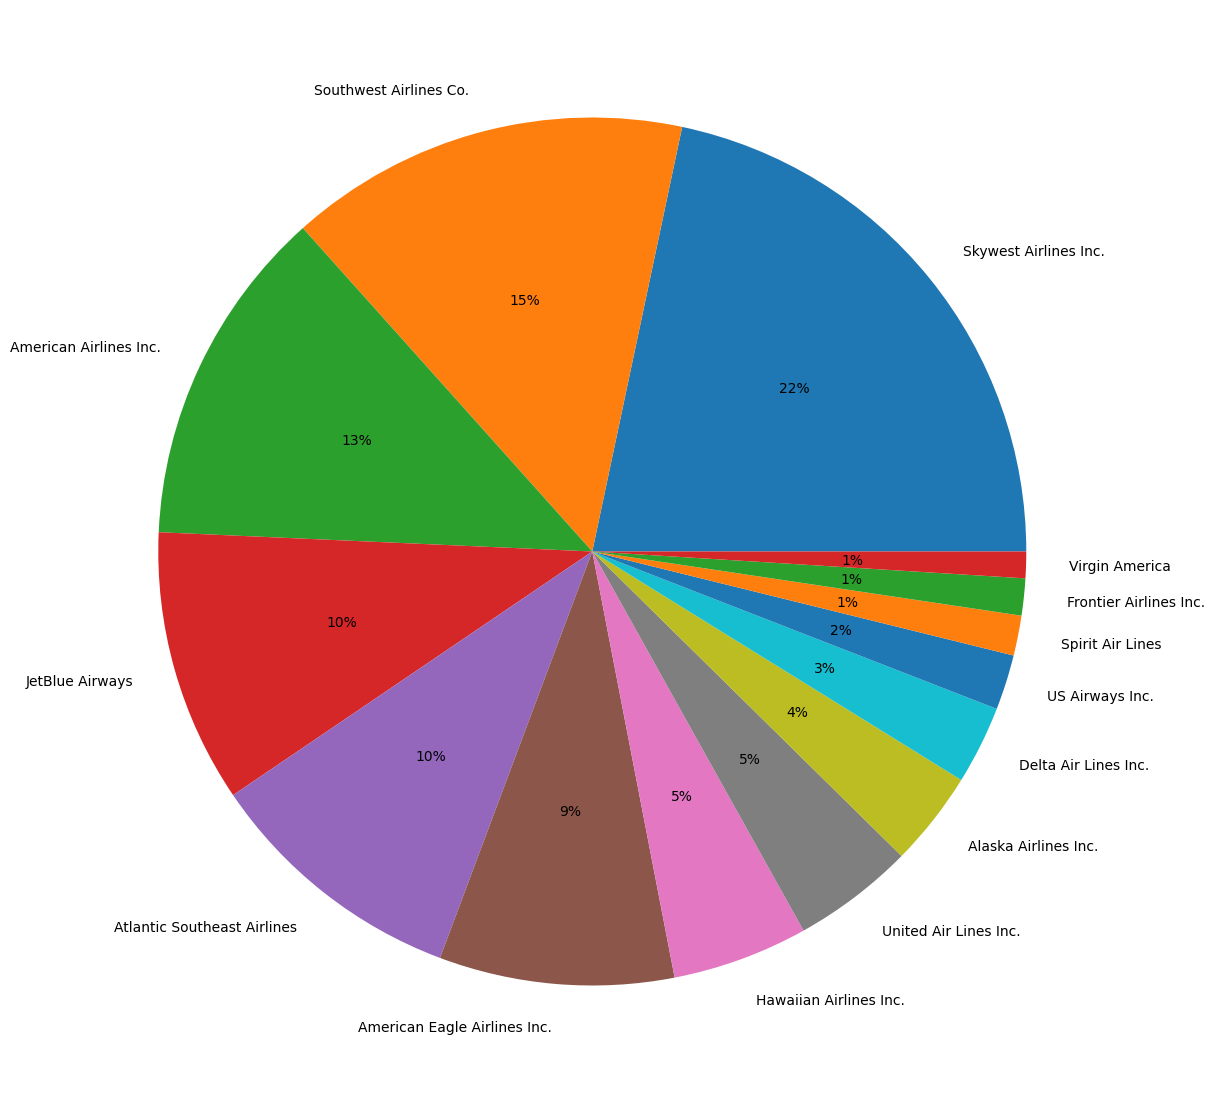

In [20]:
fig_dim = (14,18)
f, ax = plt.subplots(figsize=fig_dim)
quality=df["AIRLINE"].unique()
size=df["AIRLINE"].value_counts()

plt.pie(size,labels=quality,autopct='%1.0f%%')
plt.show()

In [21]:
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].astype('object')
df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].astype('object')

In [22]:
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIRLINE,DELAYED,Status,lat,lon
0,2015,3,15,7,4790,N825SK,SEA,PDX,1415,1558.0,103.0,17.0,1615.0,55.0,62.0,39.0,129,1654.0,6.0,1510,1700.0,110.0,0,0,NaN,7.0,0.0,12.0,91.0,0.0,Skywest Airlines Inc.,1,2.0,47.448982,-122.309313
1,2015,7,12,7,665,N965WN,OAK,PDX,1930,1943.0,13.0,8.0,1951.0,90.0,83.0,72.0,543,2103.0,3.0,2100,2106.0,6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,1,0.0,37.721291,-122.220717
2,2015,5,23,6,55,N3EGAA,ORD,MCO,1450,1445.0,-5.0,9.0,1454.0,164.0,147.0,132.0,1005,1806.0,6.0,1834,1812.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,0,0.0,41.979595,-87.904464
3,2015,2,27,5,1243,N318JB,DCA,CHS,1757,1755.0,-2.0,20.0,1815.0,102.0,105.0,79.0,444,1934.0,6.0,1939,1940.0,1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,JetBlue Airways,1,0.0,38.852083,-77.037722
4,2015,7,23,4,41,N362SW,LAX,SLC,750,749.0,-1.0,8.0,757.0,100.0,92.0,81.0,590,1018.0,3.0,1030,1021.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,Southwest Airlines Co.,0,0.0,33.942536,-118.408074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58186,2015,9,11,5,248,N4XVAA,DFW,BNA,700,654.0,-6.0,9.0,703.0,109.0,95.0,81.0,631,824.0,5.0,849,829.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,0,0.0,32.895951,-97.037200
58187,2015,3,17,2,808,N795SW,BWI,BNA,1835,1906.0,31.0,9.0,1915.0,115.0,109.0,94.0,587,1949.0,6.0,1930,1955.0,25.0,0,0,NaN,0.0,0.0,16.0,9.0,0.0,Southwest Airlines Co.,1,1.0,39.175402,-76.668198
58188,2015,5,13,3,406,N534JB,LGB,SEA,1110,1104.0,-6.0,15.0,1119.0,160.0,157.0,137.0,965,1336.0,5.0,1350,1341.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,JetBlue Airways,0,0.0,33.817722,-118.151611
58189,2015,7,31,5,833,N939UW,ORD,CLT,715,716.0,1.0,23.0,739.0,121.0,120.0,83.0,599,1002.0,14.0,1016,1016.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,American Airlines Inc.,0,0.0,41.979595,-87.904464


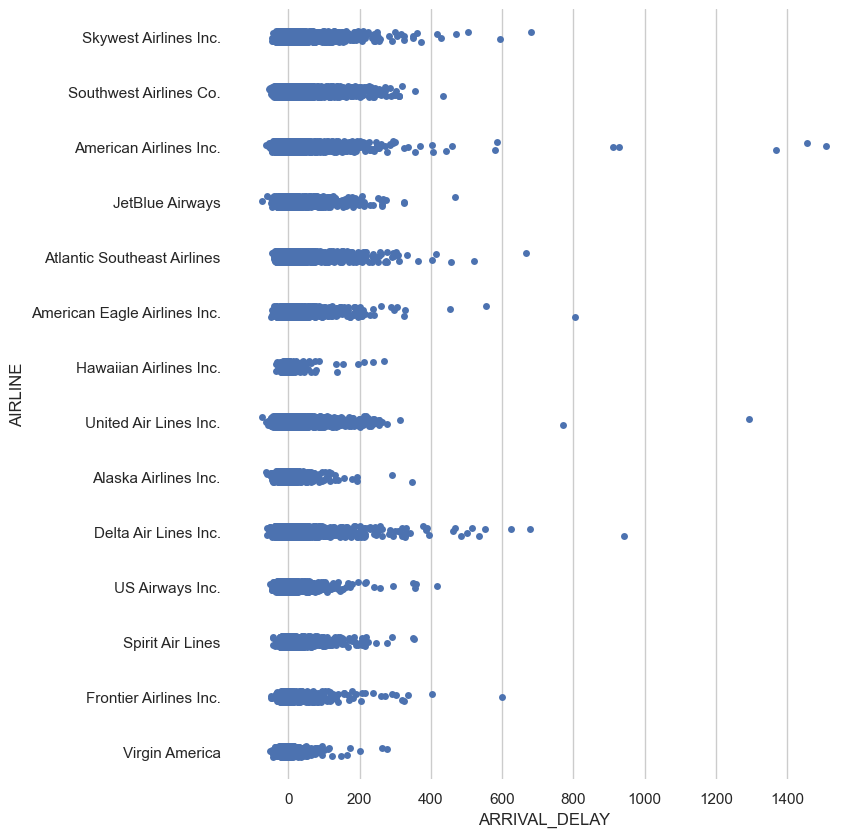

In [23]:
sns.set(style="whitegrid")

# initialize the figure
f, ax = plt.subplots(figsize=(8,10))
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data=df, dodge=True, jitter=True
            )
plt.show()

In [24]:
df['Status'].value_counts()


Status
0.0    46591
1.0     7307
2.0     3171
4.0      964
3.0      158
Name: count, dtype: int64

<Axes: xlabel='DELAYED', ylabel='count'>

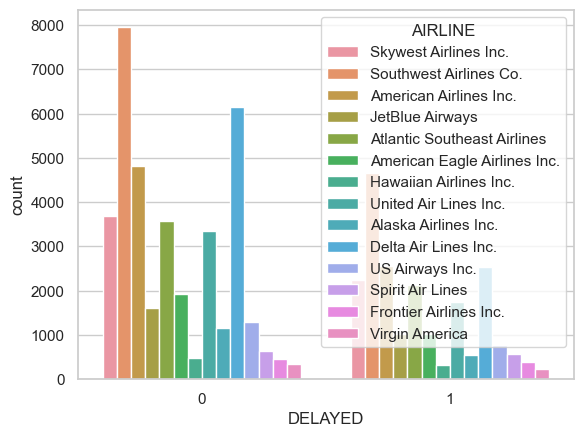

In [25]:
sns.countplot(x='DELAYED',hue='AIRLINE',data=df)
